In [1]:
# if use colab, run this part
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Final_project')

Mounted at /content/drive


In [2]:
f = open("output/directional_similarity_model1.txt")
lines = f.readlines()
f.close()
list1 = [float(i) for i in lines]
len(list1)

100

In [3]:
f = open("output2/directional_similarity_ip2p.txt")
lines2 = f.readlines()
f.close()
list2 = [float(i) for i in lines2]
len(list2)

100

In [4]:
f = open("output3/directional_similarity_model3.txt")
lines3 = f.readlines()
f.close()
list3 = [float(i) for i in lines3]
len(list3)

100

In [5]:
f = open("output4/directional_similarity_model4.txt")
lines4 = f.readlines()
f.close()
list4 = [float(i) for i in lines4]
len(list4)

100

In [6]:
f = open("output5/directional_similarity_model5.txt")
lines5 = f.readlines()
f.close()
list5 = [float(i) for i in lines5]
len(list5)

100

In [7]:
import numpy as np

mean_1 = np.mean(list1)
mean_2 = np.mean(list2)
mean_3 = np.mean(list3)
mean_4 = np.mean(list4)
mean_5 = np.mean(list5)
print(mean_1)
print(mean_2)
print(mean_3)
print(mean_4)
print(mean_5)

0.11156064325943589
0.10489021470304578
0.11371384009718895
0.11446549708023668
0.09864165158942342


Text(0.5, 1.0, 'CLIP Directional Similarity of Different Models')

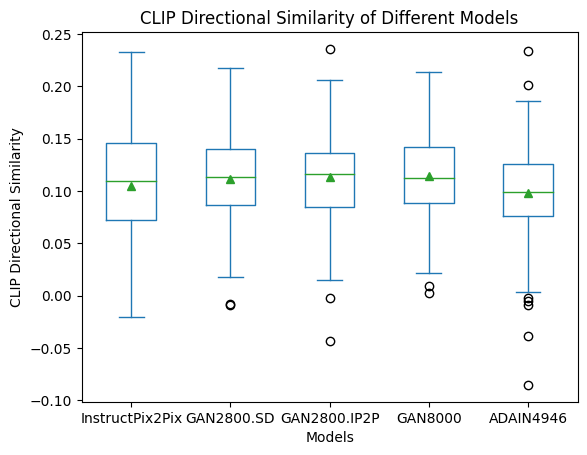

In [17]:
import pandas as pd

df = pd.DataFrame({"InstructPix2Pix":list2,"GAN2800.SD": list1, "GAN2800.IP2P": list3, "GAN8000":list4, "ADAIN4946":list5})
ax = df.plot.box(showmeans = True)
ax.set_xlabel('Models')
ax.set_ylabel('CLIP Directional Similarity')
ax.set_title('CLIP Directional Similarity of Different Models')

In [10]:
list1sim = []
with open("output/similarity_ours.txt","r") as f:
    for ele in f.read().split("\n")[:-1]:
        list1sim.append(float(ele))

In [11]:
list2sim = []
with open("output2/similarity_original.txt","r") as f:
    for ele in f.read().split("\n")[:-1]:
        list2sim.append(float(ele))

In [12]:
list3sim = []
with open("output3/similarity_ours.txt","r") as f:
    for ele in f.read().split("\n")[:-1]:
        list3sim.append(float(ele))

In [13]:
list4sim = []
with open("output4/similarity_ours.txt","r") as f:
    for ele in f.read().split("\n")[:-1]:
        list4sim.append(float(ele))

In [14]:
list5sim = []
with open("output5/similarity_ours.txt","r") as f:
    for ele in f.read().split("\n")[:-1]:
        list5sim.append(float(ele))

## Scatter Plot

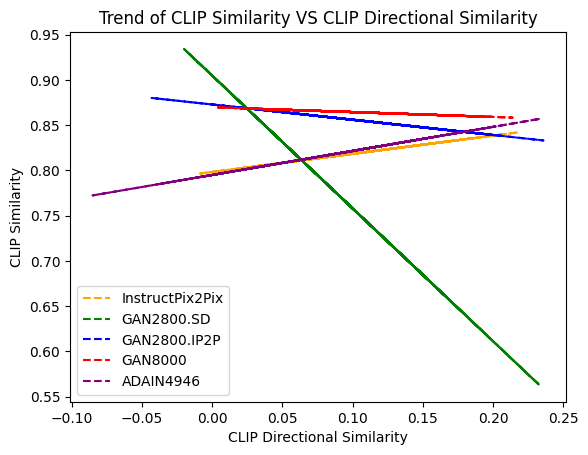

In [16]:
import matplotlib.pyplot as plt

# Function to reduce points and fit a line
def reduce_and_fit(x, y, num_points=10):
    indices = np.linspace(0, len(x) - 1, num_points).astype(int)  # Ensuring indices are integers
    x_reduced, y_reduced = x[indices], y[indices]
    coeffs = np.polyfit(x_reduced, y_reduced, 1)  # Linear fit
    p = np.poly1d(coeffs)
    return x_reduced, y_reduced, p

# Plotting
colors = ['orange', 'green', 'blue', 'red', 'purple']
data_pairs = [(list1, list1sim), (list2, list2sim), (list3, list3sim), (list4, list4sim), (list5,list5sim)]  # Add more pairs as needed

for (x, y), color in zip(data_pairs, colors):
    x_reduced, y_reduced, p = reduce_and_fit(np.array(x), np.array(y))
    #plt.scatter(x_reduced, y_reduced, color=color)
    label = None
    if color == 'orange':
        label = "InstructPix2Pix"
    if color == 'green':
        label = "GAN2800.SD"
    if color == 'blue':
        label = "GAN2800.IP2P"
    if color == "red":
        label = "GAN8000"
    if color == "purple":
        label = "ADAIN4946"
    plt.plot(x, p(x), color=color, linestyle='--', label=label)

plt.title('Trend of CLIP Similarity VS CLIP Directional Similarity')
plt.xlabel('CLIP Directional Similarity')
plt.ylabel('CLIP Similarity')
plt.legend()
plt.show()